In [1]:
import numpy as np
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def load_data(fPath):
    df = pd.read_csv(fPath, header = None, skipinitialspace = True)
    # get classes to list
    data = df.iloc[:,:].to_numpy().copy()
    # get data to list
    #print(data.groupby(by=0).count())
    #print(df)
    #df2 = df.groupby([4,0], as_index = False).count()
    #print(df2)
    
    #df1 = df.iloc[:, 0:-1].to_numpy()
    #print(df1)
    return data

fPath = "dummy3.txt"
data = load_data(fPath)
print(data, data.shape)

[[1.  0.3 1. ]
 [2.  0.6 1. ]
 [3.  0.7 0. ]
 [4.  0.4 0. ]
 [5.  0.6 1. ]] (5, 3)


##### Compute (1) the classification accuracy, (2) the positive class (represented by 1) precision, recall,
##### F1 score, and (3) TPR (true positive rate), FPR (false positive rate), sensitivity, and specificity.
##### Negative class is represented by 0. If Pr(1 | x) > 0.5, we predict x as positive; otherwise negative.

In [3]:
def convert_prob_to_class(dataIn):
    data = dataIn.copy()
    data[:,1] = np.where(data[:,1]>0,1,0)
    
    return data

data1 = convert_prob_to_class(data)

In [14]:
def compute_confusion_matrix(data):
    total = data.shape[0]
    # 1. Compute all Correct and wrong classifications
    wrong = np.abs(data[:,1] - data[:,2]).sum()
    correct = data.shape[0]- wrong
    accuracy = correct / total
    # Comptue all positive and negative predictions
    predPositive = data[data[:,1] ==1].shape[0]
    predNegative = data[data[:,1] ==0].shape[0]
     # Compute True positive, True Negative, Fase Positive, False Negative
    tp = data[ (data[:,1] ==1) & (data[:,2] == 1)].shape[0]
    tn = data[ (data[:,1] ==0) & (data[:,2] == 0)].shape[0]
    fp = data[ (data[:,1] ==1) & (data[:,2] == 0)].shape[0]
    fn = data[ (data[:,1] ==0) & (data[:,2] == 1)].shape[0]
    # Compute the total Positive and Negative (true conditions)
    totalPos = data[data[:,2] ==1].shape[0]
    totalNeg = data[data[:,2] ==0].shape[0]
    print(correct, wrong)
    print(tp,tn,fp,fn)
    # 2. Precision, Recall, F1
    precision = tp / predPositive
    recall = tp / totalPos
    f1 = 2 * (precision * recall) / (precision+recall)
    # 3. True Positive Rate, False Positive Rate Sensitivity, Specificity
    sensitivity = TPR = recall 
    FNR = fn / totalPos
    FPR = fp / totalNeg
    specificity = tn / totalNeg
    fullM = {'tp':tp, 'tn':tn,'fp':fp,'fn':fn,'accuracy':accuracy, 'precision':precision,'recall':recall, 'f1':f1,'sensitivity':sensitivity,
            'TPR':TPR,'FNR':FNR, 'FPR':FPR, 'specificity':specificity, 'total':total, 'predPositive':predPositive,'prednegative':predNegative,'totalPos':totalPos, 'totalNeg':totalNeg}
    sortM = {'Accuracy':accuracy, 'Precision':precision,'Recall':recall, 'F1':f1,'TPR':TPR,'FPR':FPR, 'Specificity':specificity, 'Sensitivity':sensitivity}
    return fullM, sortM
    
fullConfMatrix, shortM = compute_confusion_matrix(data1)
print(fullConfMatrix)

3.0 2.0
3 0 2 0
{'tp': 3, 'tn': 0, 'fp': 2, 'fn': 0, 'accuracy': 0.6, 'precision': 0.6, 'recall': 1.0, 'f1': 0.7499999999999999, 'sensitivity': 1.0, 'TPR': 1.0, 'FNR': 0.0, 'FPR': 1.0, 'specificity': 0.0, 'total': 5, 'predPositive': 5, 'prednegative': 0, 'totalPos': 3, 'totalNeg': 2}


In [15]:
def conf_mat_to_str(confMatrix):
    #print(*['({} {})\n'.format(k,v) for k,v in confMatrix.items()])
    retStr = '(\n' + '\n'.join('({} {})'.format(k,v) for k,v in confMatrix.items()) + '\n)'
    return retStr

def write_string_to_file(s, wFile = 'results3.txt'):
    
    try:
        with open(wFile, 'w') as wf:
            wf.write(s)
    except Exception as e:
        print(e)
        
confStr = conf_mat_to_str(shortM)
write_string_to_file(confStr)
print(confStr)

(
(Accuracy 0.6)
(Precision 0.6)
(Recall 1.0)
(F1 0.7499999999999999)
(TPR 1.0)
(FPR 1.0)
(Specificity 0.0)
(Sensitivity 1.0)
)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [1.         1.         1.         0.66666667 0.66666667 0.66666667
 0.         0.         0.         0.        ] [1.  1.  1.  1.  0.5 0.5 0.5 0.  0.  0. ] 0 2 0 3
0.0 1.0 1.0
0.1 1.0 1.0
0.2 1.0 1.0
0.30000000000000004 1.0 0.6666666666666666
0.4 0.5 0.6666666666666666
0.5 0.5 0.6666666666666666
0.6000000000000001 0.5 0.0
0.7000000000000001 0.0 0.0
0.8 0.0 0.0
0.9 0.0 0.0
AUC: 0.33333333333333326
0.33333333333333326


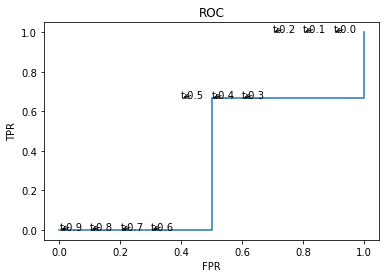

In [13]:
def compute_AUC(dataIn, threshold=np.arange(0.0,1, 0.1)):
    TPR =  np.zeros(len(threshold))
    FPR  = np.zeros(len(threshold))
    for i,t in enumerate(threshold):
        data = dataIn.copy()
        data[:,1] = np.where(data[:,1]>t,1,0)
        tp = data[ (data[:,1] ==1) & (data[:,2] == 1)].shape[0]
        tn = data[ (data[:,1] ==0) & (data[:,2] == 0)].shape[0]
        fp = data[ (data[:,1] ==1) & (data[:,2] == 0)].shape[0]
        fn = data[ (data[:,1] ==0) & (data[:,2] == 1)].shape[0]
        # Comptue all positive and negative predictions
        predPositive = data[data[:,1] ==1].shape[0]
        predNegative = data[data[:,1] ==0].shape[0]
        # Compute the total Positive and Negative (true conditions)
        totalPos = data[data[:,2] ==1].shape[0]
        totalNeg = data[data[:,2] ==0].shape[0]
        TPR[i] = tp / totalPos
        FPR[i] = fp / totalNeg
    print(threshold, TPR, FPR,tp,tn,fp,fn)
    # PLot AUC
    fig, ax = plt.subplots()
    plt.title("ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
    for i, t in enumerate(threshold):
        print(t, FPR[i], TPR[i])
        ax.annotate('t:{0:.1f}'.format(t), (threshold[-1-i], TPR[i]), arrowprops={'arrowstyle':'->'})
    plt.plot(FPR, TPR)
    # Manually compute AUC, using the trapezoid rule for integration.
    # Keep in mind that we compute this in reverse ( >threshold: 0 become class 1 so FPR,TRP =1 at index 1 of the arrays)
    # In order to accuratey compute the AUC in this setting we actaully take 1-area
    area = leftX = 0
    for tpr, fpr in zip(TPR,FPR):
        area += (fpr -leftX) * (tpr)
        leftX = fpr
        #print("Current area: ", 1-area)
    print("AUC:", 1-area)
    return 1-area
        
auc = compute_AUC(data)
print(auc)

0.3333333333333333

[0.         0.         0.66666667 0.66666667 1.        ] [0.  0.5 0.5 1.  1. ] [1.7 0.7 0.6 0.4 0.3]
